In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import binned_statistic_2d, binned_statistic
from src.configs import *
from src.regions import *
from src.plotting import *

## Targeting Max Precip
Here we examine the relationship between system morphology (primarily the fractional composition of convective and stratiform pixels in a given system) and the pixel-scale maximal precipitation value of the system. 

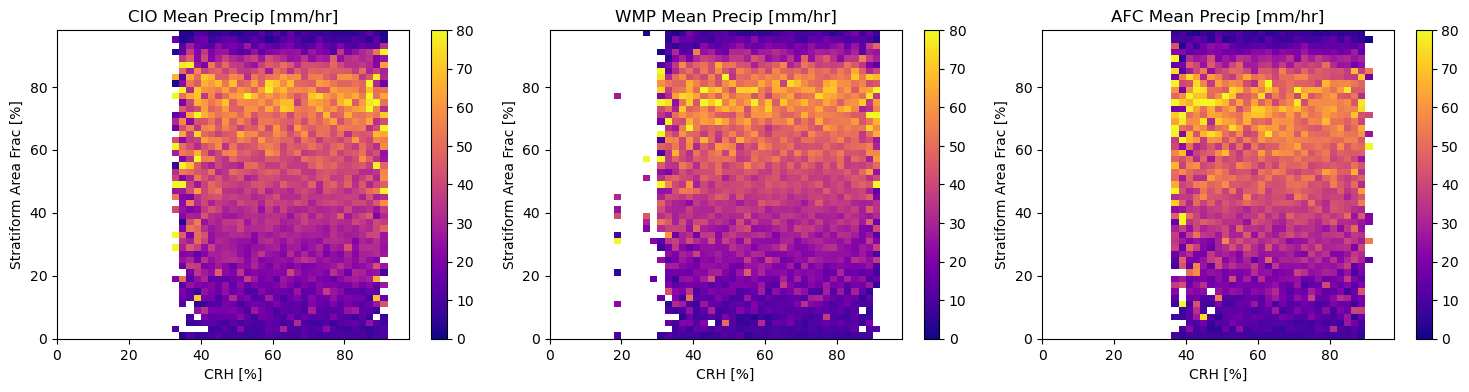

In [30]:
# Comparing max precip and stratiform area frac
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    # saf = 100*(pf_stats.total_strat_precip)/(pf_stats.total_precip)
    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    # data_to_bin = pf_stats.total_precip/pf_stats.num_pixels
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(crh_bins), array_midpoints(saf_bins))
    cmap = plt.cm.plasma
    norm = colors.Normalize(vmin=0, vmax=80)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('CRH [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Mean Precip [mm/hr]')

    
fig.tight_layout(pad=1)

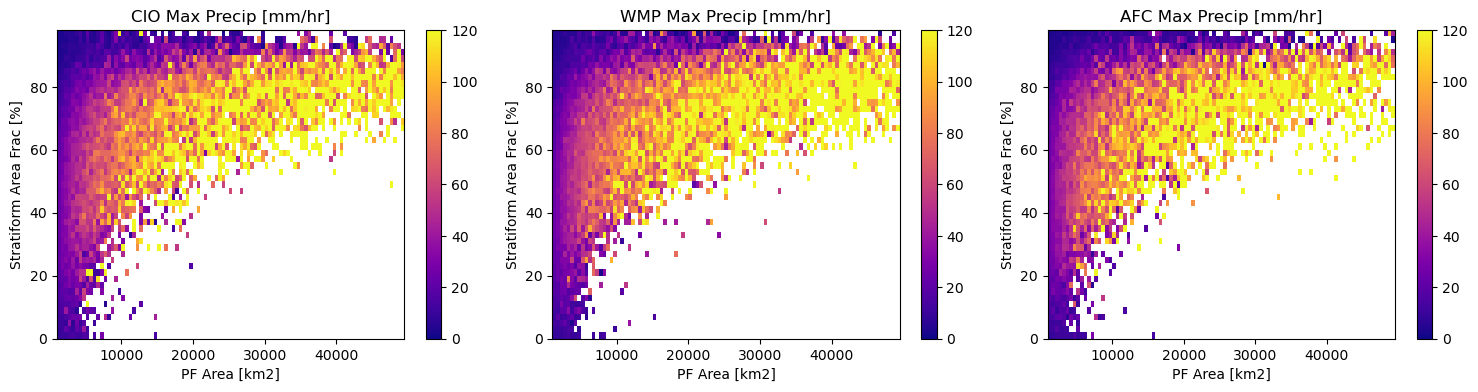

In [64]:
# Comparing max precip and stratiform area frac
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.num_pixels*25
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    # saf = 100*(pf_stats.total_strat_precip)/(pf_stats.total_precip)
    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    # data_to_bin = pf_stats.total_precip/pf_stats.num_pixels
    crh_bins = np.arange(1000, 50_000, 500)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(crh_bins), array_midpoints(saf_bins))
    cmap = plt.cm.plasma
    norm = colors.Normalize(vmin=0, vmax=120)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('PF Area [km2]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Max Precip [mm/hr]')

    
fig.tight_layout(pad=1)

CIO: Max Mean Max Precip = 3.72 mm/hr at Saf = 49.00%
WMP: Max Mean Max Precip = 3.72 mm/hr at Saf = 49.00%
AFC: Max Mean Max Precip = 3.72 mm/hr at Saf = 49.00%


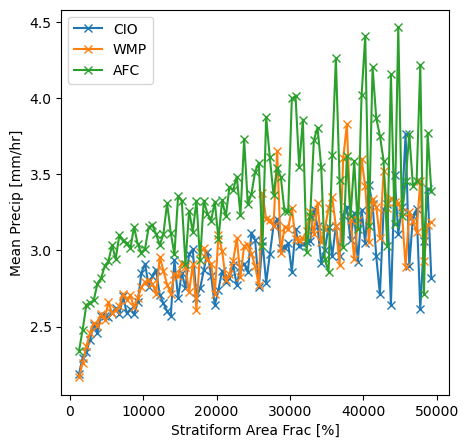

In [58]:
# Since there seems to be almost no influence by daily mean CRH, we can just look at a line plot
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = pf_stats.num_pixels*25

    data_to_bin = pf_stats.total_precip/pf_stats.num_pixels#pf_stats.max_precip # change to crh or saf to check that axes are correct

    saf_bins = np.arange(1000, 50_000, 500)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    std = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanstd(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='x', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Precip [mm/hr]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

CIO: Max Mean Max Precip = 3.18 mm/hr at Saf = 37.00%
WMP: Max Mean Max Precip = 3.14 mm/hr at Saf = 47.00%
AFC: Max Mean Max Precip = 3.72 mm/hr at Saf = 49.00%


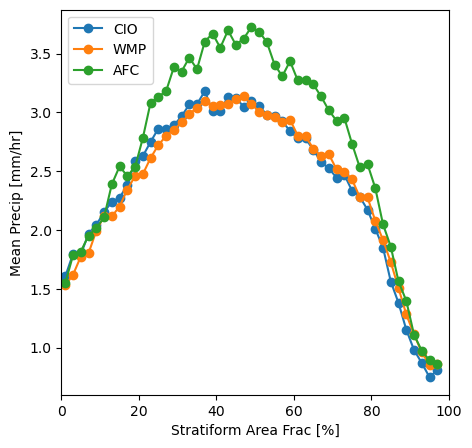

In [28]:
# Since there seems to be almost no influence by daily mean CRH, we can just look at a line plot
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    # saf = 100*(pf_stats.total_strat_precip)/(pf_stats.total_precip)

    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    data_to_bin = pf_stats.total_precip/pf_stats.num_pixels

    saf_bins = np.arange(0, 100, 2)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    std = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanstd(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Precip [mm/hr]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

CIO: Max Mean Max Precip = 59.39 mm/hr at SAF = 77.00%
WMP: Max Mean Max Precip = 61.40 mm/hr at SAF = 79.00%
AFC: Max Mean Max Precip = 60.24 mm/hr at SAF = 79.00%


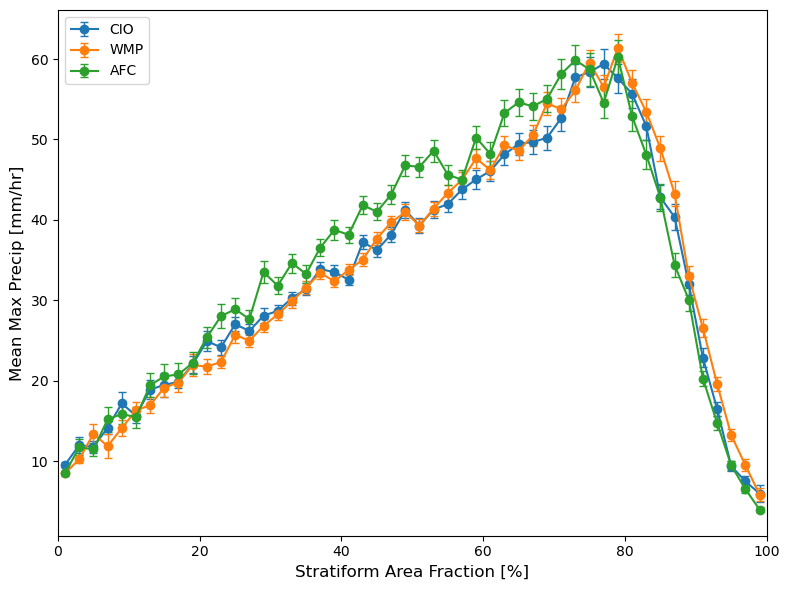

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Assuming array_midpoints is defined elsewhere
def array_midpoints(bins):
    return (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(8, 6))  # Increased figsize for better readability

for region in [cio_region(), wmp_region(), afc_region()]:
    
    # Load precipitation statistics for the region
    pf_stats = load_pf_crh(region.name, 2)
    
    # Calculate Stratiform Area Fraction (SAF) as a percentage
    saf = 100 * (pf_stats.num_strat_pixels) / (pf_stats.num_pixels)
    
    # Define the data to bin (e.g., maximum precipitation)
    data_to_bin = pf_stats.max_precip  # You can change this to crh or saf as needed
    
    # Define the bin edges for SAF
    saf_bins = np.arange(0, 102, 2)  # 0 to 100 inclusive with step 2
    
    # Calculate the mean of data_to_bin within each SAF bin
    mean_data = binned_statistic(
        saf, 
        data_to_bin, 
        bins=saf_bins, 
        statistic='mean'
    ).statistic
    
    # Calculate the standard deviation within each SAF bin
    std = binned_statistic(
        saf, 
        data_to_bin, 
        bins=saf_bins, 
        statistic='std'
    ).statistic
    
    # Calculate the count of data points in each SAF bin
    count = binned_statistic(
        saf, 
        data_to_bin, 
        bins=saf_bins, 
        statistic='count'
    ).statistic
    
    # Avoid division by zero by setting SE to NaN where count is zero
    with np.errstate(divide='ignore', invalid='ignore'):
        standard_error = std / np.sqrt(count)
        standard_error[count == 0] = np.nan  # Assign NaN where count is zero
    
    # Calculate the midpoints of each SAF bin for plotting
    saf_midpoints = array_midpoints(saf_bins)
    
    # Plot the mean data with error bars representing the standard error
    ax.errorbar(
        saf_midpoints, 
        mean_data, 
        yerr=standard_error, 
        marker='o', 
        linestyle='-', 
        label=f'{region.name}',
        capsize=3,  # Adds caps to the error bars
        elinewidth=1,  # Thickness of the error bars
        markeredgewidth=1  # Thickness of the marker edges
    )
    
    # Set plot labels
    ax.set_ylabel('Mean Max Precip [mm/hr]', fontsize=12)
    ax.set_xlabel('Stratiform Area Fraction [%]', fontsize=12)
    
    # Set x-axis limits with a little padding
    ax.set_xlim(0, 100)
    
    # Add a legend with a white background
    ax.legend(loc='upper left', frameon=True, facecolor='white', fontsize=10)
    
    # Identify and print the maximum mean precipitation and its corresponding SAF
    max_idx = np.nanargmax(mean_data)
    max_x = saf_midpoints[max_idx]
    max_y = mean_data[max_idx]
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at SAF = {max_x:.2f}%")

# Improve layout and display the plot
plt.tight_layout()
plt.show()


CIO: Max Mean Max Precip = 59.39 mm/hr at Saf = 77.00%
WMP: Max Mean Max Precip = 61.40 mm/hr at Saf = 79.00%
AFC: Max Mean Max Precip = 60.24 mm/hr at Saf = 79.00%


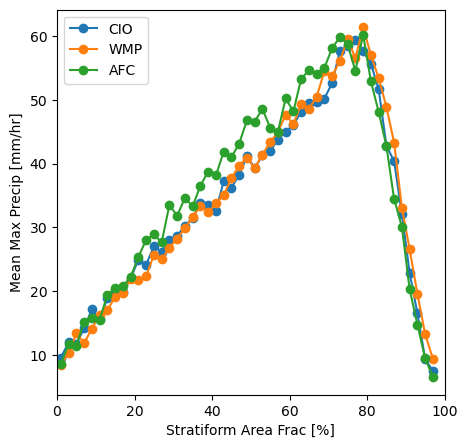

In [5]:
# Since there seems to be almost no influence by daily mean CRH, we can just look at a line plot
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    saf_bins = np.arange(0, 100, 2)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Max Precip [mm/hr]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

CIO: Max Mean Max Precip = 132.68 mm/hr at Saf = 1815.00%
WMP: Max Mean Max Precip = 142.51 mm/hr at Saf = 1765.00%
AFC: Max Mean Max Precip = 145.41 mm/hr at Saf = 1765.00%


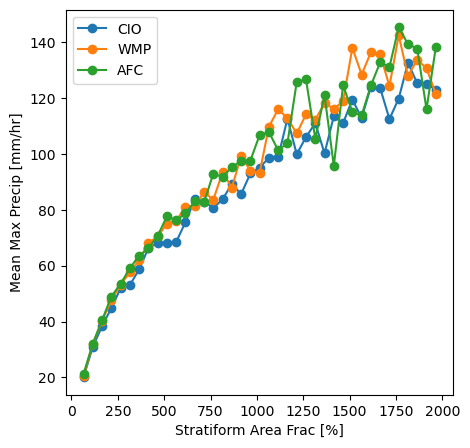

In [217]:
# Since there seems to be almost no influence by daily mean CRH, we can just look at a line plot
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = (pf_stats.num_pixels)
    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    saf_bins = np.arange(40, 2000, 50)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Max Precip [mm/hr]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

- Systems with a stratiform area fraction of ~75%-80% have on average a greater maximal precipitation rate. This indicates that the systems with the most intense pixel-scale precip also have sizable stratiform anvils; these systems can be assumed to be long-lived MCSs (Houze 2005, etc)

CIO: Max Mean Max Precip = 97.59 mm/hr at Saf = 97.00%
WMP: Max Mean Max Precip = 97.52 mm/hr at Saf = 97.00%
AFC: Max Mean Max Precip = 97.89 mm/hr at Saf = 97.00%


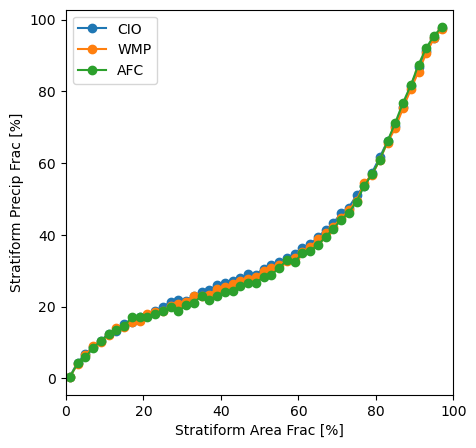

In [200]:
# Since there seems to be almost no influence by daily mean CRH, we can just look at a line plot
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = 100*(pf_stats.total_strat_precip)/(pf_stats.total_precip) # change to crh or saf to check that axes are correct
    saf_bins = np.arange(0, 100, 2)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Stratiform Precip Frac [%]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

CIO: Max Mean Max Precip = 99.54 mm/hr at Saf = 1.00%
WMP: Max Mean Max Precip = 99.65 mm/hr at Saf = 1.00%
AFC: Max Mean Max Precip = 99.69 mm/hr at Saf = 1.00%


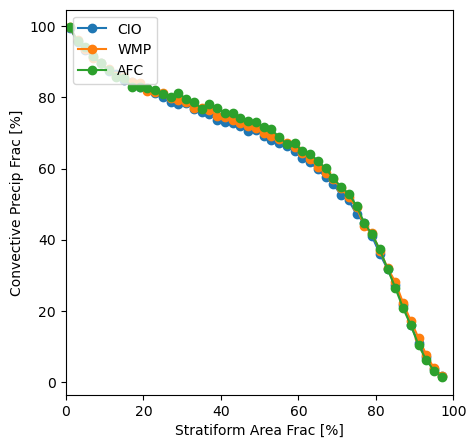

In [210]:
# Since there seems to be almost no influence by daily mean CRH, we can just look at a line plot
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = 100*(pf_stats.total_conv_precip)/(pf_stats.total_precip) # change to crh or saf to check that axes are correct
    saf_bins = np.arange(0, 100, 2)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Convective Precip Frac [%]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

- So there is a non-linear relationship with stratiform area fraction and stratiform precipitation fraction. 
- For SAF between 20 and 60, increasing stratiform area results in less stratiform precip than for SAF>60-ish
- Hypothesis: from 20 to 60 SAF, growing SAF is associated with more convection, so the contribution to rain fraction is diluted. Above 60%, growing SAF does not come from a growing convective core so there is a stronger projection onto rain fraction.  

CIO: Max Mean Max Precip = 84.89 mm/hr at Saf = 83.00%
WMP: Max Mean Max Precip = 78.22 mm/hr at Saf = 83.00%
AFC: Max Mean Max Precip = 78.70 mm/hr at Saf = 79.00%


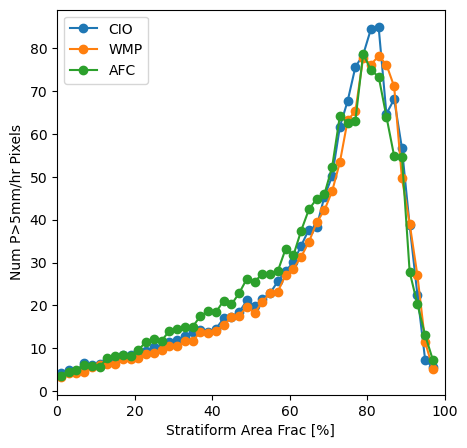

In [207]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = pf_stats.num_5mmhr_pixels # change to crh or saf to check that axes are correct
    saf_bins = np.arange(0, 100, 2)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Num P>5mm/hr Pixels')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

CIO: Max Mean Max Precip = 32.23 mm/hr at Saf = 83.00%
WMP: Max Mean Max Precip = 28.31 mm/hr at Saf = 83.00%
AFC: Max Mean Max Precip = 30.96 mm/hr at Saf = 79.00%


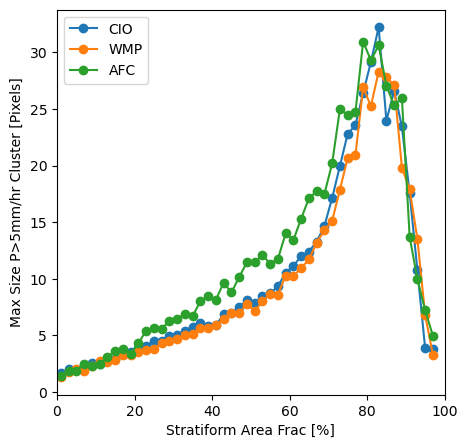

In [209]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = pf_stats.max_5mmhr_size # change to crh or saf to check that axes are correct
    saf_bins = np.arange(0, 100, 2)

    mean_data = binned_statistic(saf, data_to_bin, bins=saf_bins, statistic=lambda x: np.nanmean(x)).statistic
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Max Size P>5mm/hr Cluster [Pixels]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

CIO: Max Mean Max Precip = 13.54 mm/hr at Saf = 31.00%
WMP: Max Mean Max Precip = 14.02 mm/hr at Saf = 35.00%
AFC: Max Mean Max Precip = 13.40 mm/hr at Saf = 21.00%


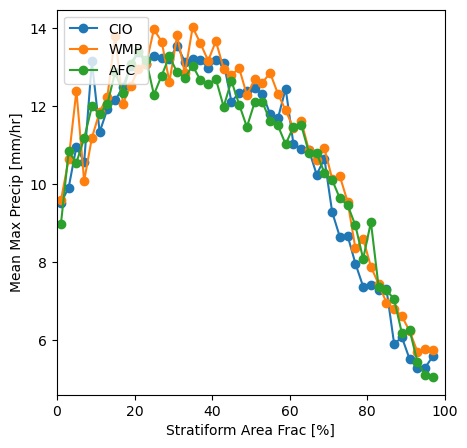

In [172]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = 100*pf_stats.max_precip/(pf_stats.total_precip) # change to crh or saf to check that axes are correct
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    mean_data = np.nanmean(hist, axis=1)  # Shape: (len(saf_bins)-1,)
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Max Precip [mm/hr]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")
    
    
    

CIO: Max Mean Max Precip = 69.57 mm/hr at Saf = 19.00%
WMP: Max Mean Max Precip = 68.19 mm/hr at Saf = 15.00%
AFC: Max Mean Max Precip = 67.24 mm/hr at Saf = 19.00%


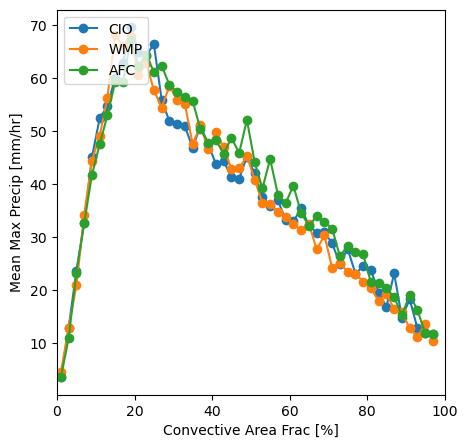

In [180]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.num_conv_pixels)/(pf_stats.num_pixels)
    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    mean_data = np.nanmean(hist, axis=1)  # Shape: (len(saf_bins)-1,)
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Max Precip [mm/hr]')
    ax.set_xlabel('Convective Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.total_conv_precip)/(pf_stats.total_precip)
    data_to_bin = 100*(pf_stats.num_strat_pixels)/(pf_stats.total_precip) # change to crh or saf to check that axes are correct
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    mean_data = np.nanmean(hist, axis=1)  # Shape: (len(saf_bins)-1,)
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Max Precip [mm/hr]')
    ax.set_xlabel('Convective Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')
    # Find the x-coordinate for maximal y value
    max_idx = np.nanargmax(mean_data)
    max_x = array_midpoints(saf_bins)[max_idx]
    max_y = mean_data[max_idx]
    
    # Print the results
    print(f"{region.name}: Max Mean Max Precip = {max_y:.2f} mm/hr at Saf = {max_x:.2f}%")

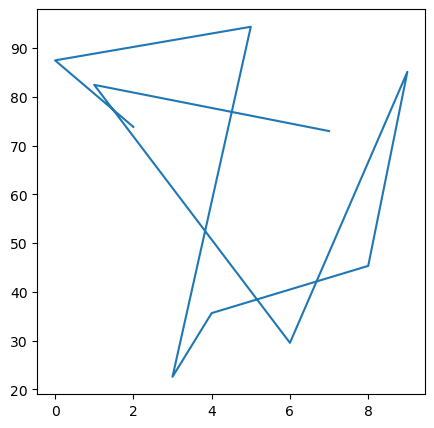

In [179]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:
    pf = load_pf_crh(region.name)
    max_sorted = pf[0:10].sort_values('max_precip')
    sf = 100*max_sorted.num_strat_pixels/max_sorted.num_pixels
    sf.plot(ax=ax)
    break

,Unnamed: 0,pf_filename,observation_time,mean_latitude,mean_longitude,precipitation_centroid_latitude,precipitation_centroid_longitude,num_pixels,num_conv_pixels,num_strat_pixels,...,max_2mmhr_size,num_5mmhr_pixels,max_5mmhr_size,num_10mmhr_pixels,max_10mmhr_size,total_precip,total_conv_precip,total_strat_precip,max_precip,crh
28461,954,/home/disk/tc/pangulo/gpm_pf/CIO/2018/05/pf_14...,20180524_14:48:35,8.226136,96.294319,8.230319,96.294316,44.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,6.012185,0.000000,2.923325,0.200880,42.861001
38080,703,/home/disk/tc/pangulo/gpm_pf/CIO/2019/07/pf_14...,20190710_03:37:27,9.047777,72.724449,9.047357,72.725778,45.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,7.613063,0.000000,4.232906,0.214237,76.795797
10704,201,/home/disk/tc/pangulo/gpm_pf/CIO/2016/05/pf_01...,20160527_11:05:25,-4.577660,96.607452,-4.575757,96.606917,47.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,7.012740,0.000000,4.760500,0.215176,58.396286
22822,833,/home/disk/tc/pangulo/gpm_pf/CIO/2017/09/pf_24...,20170902_21:40:34,6.161594,69.581161,6.157112,69.584242,69.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,11.527140,0.000000,7.361556,0.223069,68.051350
3366,666,/home/disk/tc/pangulo/gpm_pf/CIO/2015/06/pf_11...,20150603_22:33:59,5.913725,62.838234,5.909453,62.842678,51.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,7.632452,0.000000,5.521248,0.223682,77.427176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564,856,/home/disk/tc/pangulo/gpm_pf/CIO/2016/12/pf_13...,20161206_14:40:53,7.939202,95.312378,8.299859,95.496484,1931.0,413.0,1500.0,...,499.0,327.0,94.0,211.0,46.0,12318.601383,9820.399228,2494.989732,299.974670,50.964678
23324,675,/home/disk/tc/pangulo/gpm_pf/CIO/2017/10/pf_10...,20171027_04:03:42,4.221331,94.367592,4.316150,94.480069,1683.0,146.0,1504.0,...,337.0,183.0,121.0,33.0,21.0,3854.031938,1081.011317,2766.331051,299.976318,80.475496
44472,365,/home/disk/tc/pangulo/gpm_pf/CIO/2020/05/pf_04...,20200521_20:25:12,4.278623,57.807613,4.165369,58.028815,552.0,130.0,397.0,...,35.0,51.0,22.0,31.0,16.0,2516.492250,2026.319161,486.193099,299.987244,48.291583
16474,750,/home/disk/tc/pangulo/gpm_pf/CIO/2016/12/pf_11...,20161204_14:50:35,9.122109,100.545769,9.274227,100.562213,1228.0,244.0,975.0,...,434.0,281.0,151.0,156.0,97.0,9848.418060,7357.780213,2489.021979,299.987244,77.180666


## Mean precip, conditional precip, and other ad-hoc measures

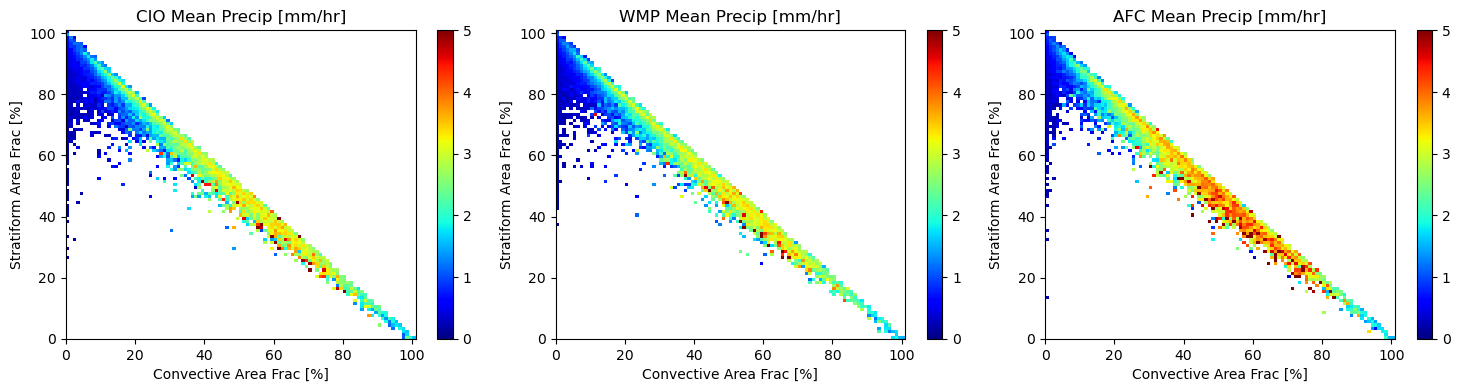

In [137]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    caf = 100*(pf_stats.num_conv_pixels)/(pf_stats.num_pixels)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = (pf_stats.total_precip)/(pf_stats.num_pixels) # change to caf or saf to check that axes are correct
    caf_bins = np.arange(0, 102, 1)
    saf_bins = np.arange(0, 102, 1)

    hist = binned_statistic_2d(saf, caf, data_to_bin, bins=[saf_bins, caf_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(caf_bins), array_midpoints(saf_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=5)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('Convective Area Frac [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Mean Precip [mm/hr]')
fig.tight_layout(pad=1)

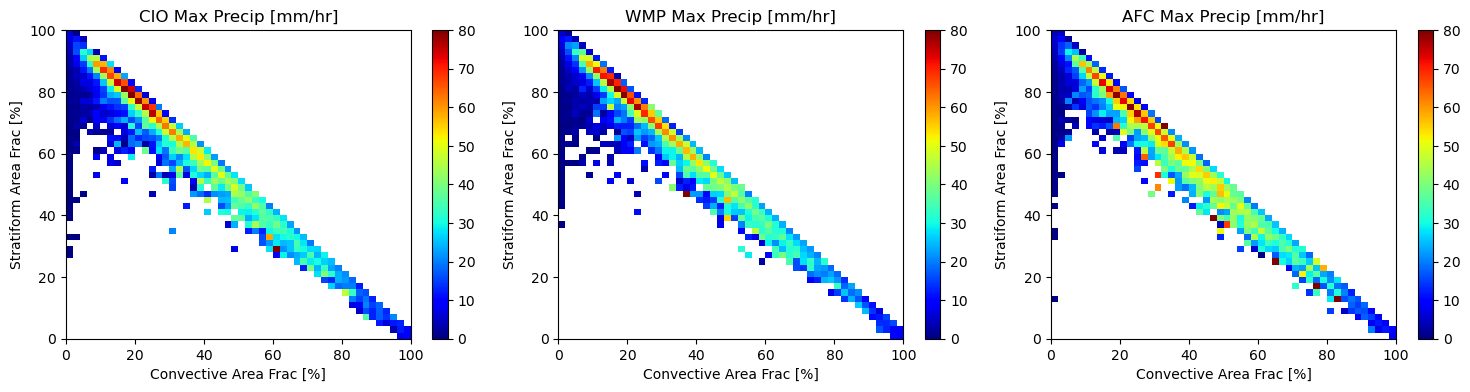

In [183]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    caf = 100*(pf_stats.num_conv_pixels)/(pf_stats.num_pixels)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = (pf_stats.max_precip) # change to caf or saf to check that axes are correct
    caf_bins = np.arange(0, 102, 2)
    saf_bins = np.arange(0, 102, 2)

    hist = binned_statistic_2d(saf, caf, data_to_bin, bins=[saf_bins, caf_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(caf_bins), array_midpoints(saf_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=80)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('Convective Area Frac [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Max Precip [mm/hr]')
fig.tight_layout(pad=1)

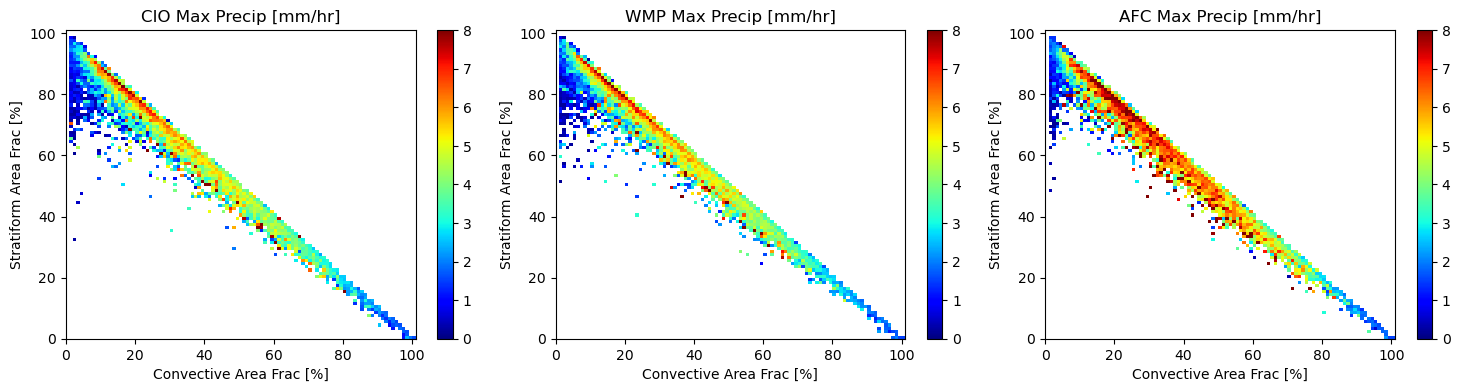

In [146]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    caf = 100*(pf_stats.num_conv_pixels)/(pf_stats.num_pixels)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = (pf_stats.total_conv_precip)/(pf_stats.num_conv_pixels) # change to caf or saf to check that axes are correct
    caf_bins = np.arange(0, 102, 1)
    saf_bins = np.arange(0, 102, 1)

    hist = binned_statistic_2d(saf, caf, data_to_bin, bins=[saf_bins, caf_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(caf_bins), array_midpoints(saf_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=8)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('Convective Area Frac [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Max Precip [mm/hr]')
fig.tight_layout(pad=1)

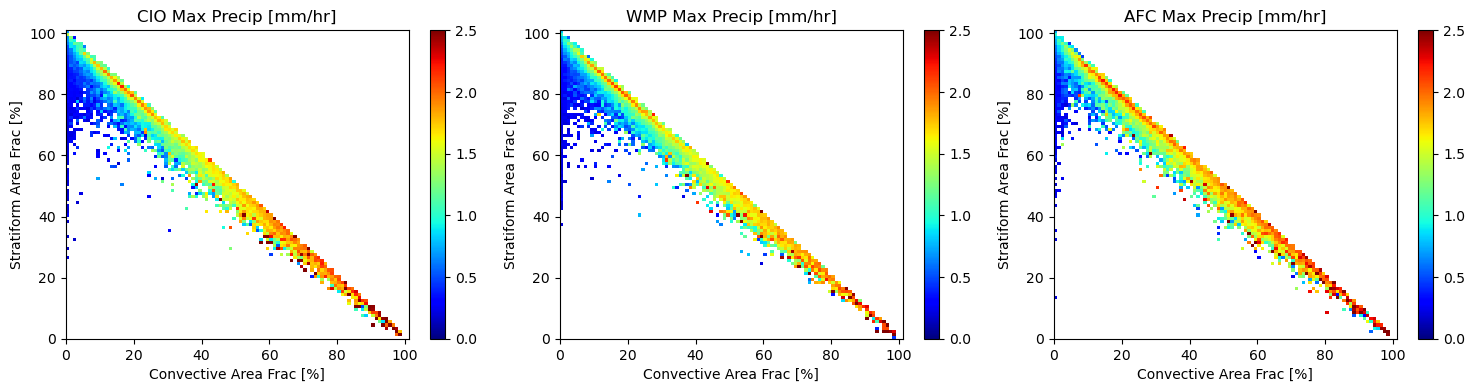

In [154]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    caf = 100*(pf_stats.num_conv_pixels)/(pf_stats.num_pixels)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = (pf_stats.total_strat_precip)/(pf_stats.num_strat_pixels) # change to caf or saf to check that axes are correct
    caf_bins = np.arange(0, 102, 1)
    saf_bins = np.arange(0, 102, 1)

    hist = binned_statistic_2d(saf, caf, data_to_bin, bins=[saf_bins, caf_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(caf_bins), array_midpoints(saf_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=2.5)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('Convective Area Frac [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Max Precip [mm/hr]')
fig.tight_layout(pad=1)

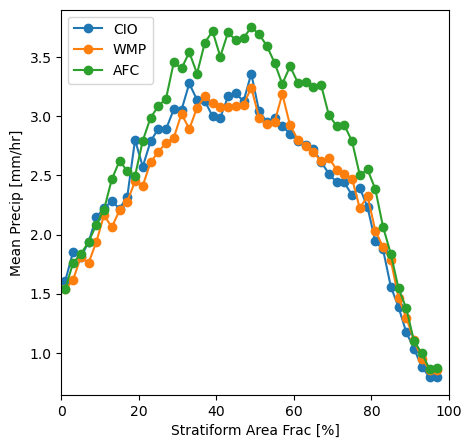

In [120]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = (pf_stats.total_precip)/(pf_stats.num_pixels) # change to crh or saf to check that axes are correct
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    mean_data = np.nanmean(hist, axis=1)  # Shape: (len(saf_bins)-1,)
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Precip [mm/hr]')
    ax.set_xlabel('Stratiform Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')

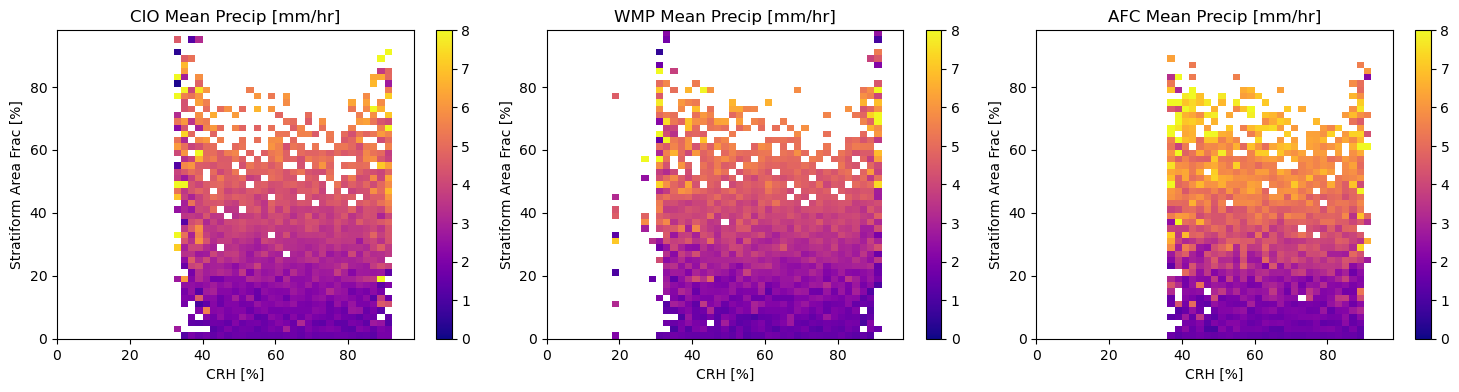

In [132]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = (pf_stats.total_conv_precip)/(pf_stats.num_conv_pixels) # change to crh or saf to check that axes are correct
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(crh_bins), array_midpoints(saf_bins))
    cmap = plt.cm.plasma
    norm = colors.Normalize(vmin=0, vmax=8)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('CRH [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Mean Precip [mm/hr]')
fig.tight_layout(pad=1)

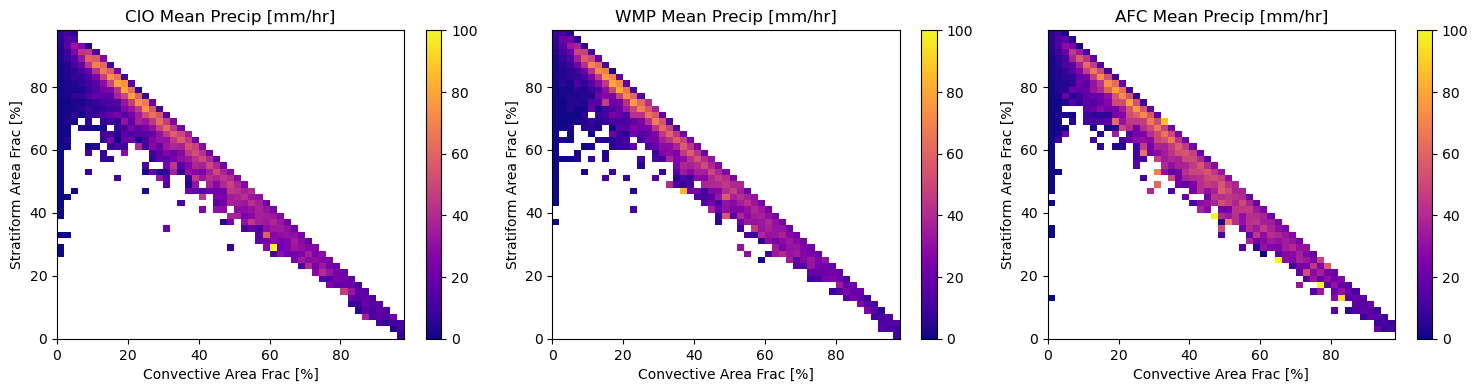

In [113]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_crh(region.name, 2)
    crh = 100*(pf_stats.num_conv_pixels)/(pf_stats.num_pixels)
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    data_to_bin = pf_stats.max_precip#(pf_stats.total_precip)/(pf_stats.num_pixels) # change to crh or saf to check that axes are correct
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(crh_bins), array_midpoints(saf_bins))
    cmap = plt.cm.plasma
    norm = colors.Normalize(vmin=0, vmax=100)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('Convective Area Frac [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Mean Precip [mm/hr]')
fig.tight_layout(pad=1)

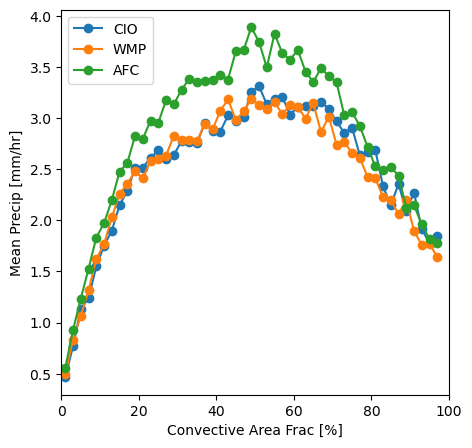

In [106]:
fig, ax = plt.subplots(figsize=(5, 5))
for region in [cio_region(), wmp_region(), afc_region()]:

    pf_stats = load_pf_crh(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.num_conv_pixels)/(pf_stats.num_pixels)
    data_to_bin = (pf_stats.total_precip)/(pf_stats.num_pixels) # change to crh or saf to check that axes are correct
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    mean_data = np.nanmean(hist, axis=1)  # Shape: (len(saf_bins)-1,)
    ax.plot(array_midpoints(saf_bins), mean_data,  marker='o', linestyle='-', label=f'{region.name}')
    ax.set_ylabel('Mean Precip [mm/hr]')
    ax.set_xlabel('Convective Area Frac [%]')

    # Optionally, adjust the limits of the secondary x-axis to fit the mean data
    ax.set_xlim(0, 100)  # Add 10% padding

    # Add a legend for the secondary plot
    ax.legend(loc='upper left', frameon=True, facecolor='white')